In [0]:
# 12151411 심경수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# 와인 데이터 읽기
white_data = pd.read_csv('winequality-white.csv', delimiter = ';', dtype = float)
red_data = pd.read_csv('winequality-red.csv', delimiter = ';', dtype = float)

# white_data.head()      # White wine 데이터의 첫 5개 레코드

In [0]:
# 데이터 전처리 과정

# 1. 각 데이터의 속성과 Null 여부 분석
print("White wine dataset information======================================")
# white_data.info()
print("Red wine dataset information========================================")
# red_data.info()

# 2. Training, Test dataset 분리과정
w_train, w_test = train_test_split(white_data, test_size = 0.3, random_state = 77)
r_train, r_test = train_test_split(red_data, test_size = 0.3, random_state = 77)

# 3. Class 분리
wx_train = w_train.drop(['quality'], axis = 1)
wy_train = w_train['quality']                     # White wine 트레이닝 셋의 Class
rx_train = r_train.drop(['quality'], axis = 1)
ry_train = r_train['quality']                     # Red wine 트레이닝 셋의 Class

wx_test = w_test.drop(['quality'], axis = 1)
wy_test = w_test['quality']                       # White wine 테스트 셋의 Class
rx_test = r_test.drop(['quality'], axis = 1)
ry_test = r_test['quality']                       # Red wine 테스트 셋의 Class

# 4. 속성값 정규화
from sklearn.preprocessing import StandardScaler

# Training set 정규화
wx_train_scale = StandardScaler().fit_transform(wx_train)
rx_train_scale = StandardScaler().fit_transform(rx_train)
# Test set 정규화
wx_test_scale = StandardScaler().fit_transform(wx_test)
rx_test_scale = StandardScaler().fit_transform(rx_test)

# pd.DataFrame(wx_train_scale).head()             # White wine 트레이닝 셋의 5개 레코드로 결고 확인

White wine dataset information======================================
Red wine dataset information========================================


In [0]:
# Neural Network 적용
import keras
from keras.layers import Dense, Dropout

white_model = keras.Sequential()          # DNN의 밑바탕이 되는 모델

# Input Layer
white_model.add(Dense(100, activation = 'relu', input_dim = 11))

# Hidden Layer degree
white_model.add(Dense(200, activation = 'relu'))
white_model.add(Dropout(0.25))          # 무작위로 전체의 25% 노드를 비활성화
white_model.add(Dense(250, activation = 'relu'))
white_model.add(Dropout(0.25))          # 무작위로 전체의 25% 노드를 비활성화
white_model.add(Dense(200, activation = 'relu'))
white_model.add(Dropout(0.25))          # 무작위로 전체의 25% 노드를 비활성화
white_model.add(Dense(100, activation = 'relu'))

# Output Layer
white_model.add(Dense(11, activation = 'softmax'))

# Way to compile
# Opt = keras.optimizers.Adam(learning_rate= 0.015)    # 최적화 도구 설정 -> Learning Rate 조정
white_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
white_model.summary()                               # 설계한 모델 정보 요약

# Training, Test 수행
# 1. 정규화를 거치지 않은 데이터로 학습, 평가
# white_log = white_model.fit(wx_train, wy_train, batch_size = 11, epochs = 120, validation_data = (wx_test, wy_test))
# 2. 정규화를 거친 데이터로 학습, 평가
white_log = white_model.fit(wx_train_scale, wy_train, batch_size = 11, epochs = 120, validation_data = (wx_test_scale, wy_test))

# Test set으로 평가한 정확도 여부를 저장
# 1. 정규화를 거치지 않은 데이터의 평가
# white_loss, white_acc = white_model.evaluate(wx_test, wy_test, verbose = 2)
# 2. 정규화를 거친 데이터의 평가
white_loss, white_acc = white_model.evaluate(wx_test_scale, wy_test, verbose = 2)
print("=========================================================================")
print("Test Accuracy : %.3f" % (white_acc * 100))                          # Test 정확도 출력
print("=========================================================================")

# Accuracy 시각화
plt.plot(white_log.history['accuracy'])
plt.plot(white_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Loss 시각화
plt.plot(white_log.history['loss'])
plt.plot(white_log.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [0]:
# Neural Network 적용
import keras
from keras.layers import Dense, Dropout

Red_model = keras.Sequential()
# input Layer
Red_model.add(Dense(100, activation = 'relu', input_dim = 11))

# Hidden Layer
Red_model.add(Dense(200, activation = 'relu'))
Red_model.add(Dropout(0.25))          # 무작위로 전체의 25% 노드를 비활성화
Red_model.add(Dense(250, activation = 'relu'))
Red_model.add(Dropout(0.25))          # 무작위로 전체의 25% 노드를 비활성화
Red_model.add(Dense(200, activation = 'relu'))
Red_model.add(Dropout(0.25))          # 무작위로 전체의 25% 노드를 비활성화
Red_model.add(Dense(100, activation = 'relu'))

# Output Layer
Red_model.add(Dense(11, activation = 'softmax'))

# Way to compile
Opt = keras.optimizers.Adam(learning_rate= 0.02)
Red_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
Red_model.summary()


# Training, Test 수행
# 1. 정규화를 거치지 않은 데이터로 학습, 평가
# Red_log = Red_model.fit(rx_train, ry_train, batch_size = 11, epochs = 120, validation_data = (rx_test, ry_test))
# 2. 정규화를 거친 데이터로 학습, 평가
Red_log = Red_model.fit(rx_train_scale, ry_train, batch_size = 11, epochs = 120, validation_data = (rx_test_scale, ry_test))

# Test set으로 평가한 정확도 여부를 저장
# 1. 정규화를 거치지 않은 데이터의 평가
# red_loss, red_acc = Red_model.evaluate(rx_test, ry_test, verbose = 2)
# 2. 정규화를 거친 데이터의 평가
red_loss, red_acc = Red_model.evaluate(rx_test_scale, ry_test, verbose = 2)
print("=========================================================================")
print("Test Accuracy : %.3f" % (red_acc * 100))                          # Test 정확도 출력
print("=========================================================================")

# Accuracy 시각화
plt.plot(Red_log.history['accuracy'])
plt.plot(Red_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Loss 시각화
plt.plot(Red_log.history['loss'])
plt.plot(Red_log.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [0]:
# 와인 데이터 통합
wine_data = white_data.append(red_data)       # 전처리 이전의 와인 데이터 통합
wine_data.head()                              # 첫 5개 데이터 확인
wine_data.info()                              # 병합되었는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
dtypes: float64(12)
memory usage: 659.9 KB


In [0]:
# 데이터 전처리
# Training set, Test set 분리
wine_train, wine_test = train_test_split(wine_data, test_size = 0.3, random_state = 77)

# Training set, Test set의 Class 분리
x_train = wine_train.drop(['quality'], axis = 1)
y_train = wine_train['quality']                 # 트레이닝 셋의 Class
x_test = wine_test.drop(['quality'], axis = 1)
y_test = wine_test['quality']                   # 테스트 셋의 Class

# x_train.head()                                  # 첫 5개 데이터 확인

# 속성값 정규화
# 여러 정규화 도구를 적용하여 테스트했습니다.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

# x_train_scale = StandardScaler().fit_transform(x_train)
x_train_scale = RobustScaler().fit_transform(x_train)
# x_train_scale = MinMaxScaler().fit_transform(x_train)
# x_train_scale = MaxAbsScaler().fit_transform(x_train)

# x_test_scale = StandardScaler().fit_transform(x_test)
x_test_scale = RobustScaler().fit_transform(x_test)
# x_test_scale = MinMaxScaler().fit_transform(x_test)
# x_test_scale = MaxAbsScaler().fit_transform(x_test)

# x_train_scale.head()                            # 정규화를 거친 데이터 확인

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_24 (Dense)             (None, 48)                1584      
_________________________________________________________________
dropout_14 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                3136      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 48)                3120      
_________________________________________________________________
dropout_16 (Dropout)         (None, 48)               

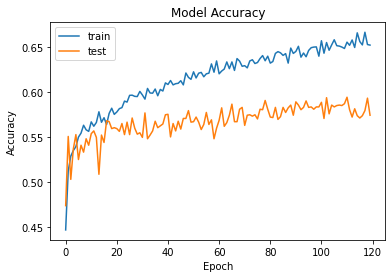

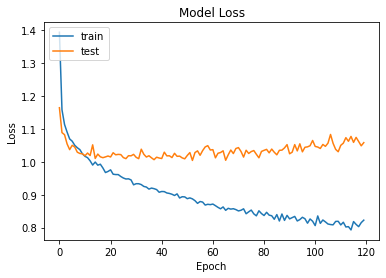

In [0]:
# 와인 통합분류 모델 생성
import keras
from keras.layers import Dense, Dropout

Wine_model = keras.Sequential()

# Input Layer
Wine_model.add(Dense(32, activation = 'relu', input_dim = 11))

# Hidden Layer
Wine_model.add(Dense(48, activation = 'relu'))
Wine_model.add(Dropout(0.25))               # 전체 노드의 25% 비활성화
Wine_model.add(Dense(64, activation = 'relu'))
Wine_model.add(Dropout(0.25))               # 전체 노드의 25% 비활성화
Wine_model.add(Dense(80, activation = 'relu'))
Wine_model.add(Dropout(0.25))               # 전체 노드의 25% 비활성화
Wine_model.add(Dense(96, activation = 'relu'))
Wine_model.add(Dropout(0.25))               # 전체 노드의 25% 비활성화
Wine_model.add(Dense(80, activation = 'relu'))
Wine_model.add(Dropout(0.25))               # 전체 노드의 25% 비활성화
Wine_model.add(Dense(64, activation = 'relu'))
Wine_model.add(Dropout(0.25))               # 전체 노드의 25% 비활성화
Wine_model.add(Dense(48, activation = 'relu'))
Wine_model.add(Dropout(0.25))               # 전체 노드의 25% 비활성화
Wine_model.add(Dense(32, activation = 'relu'))

# Output Layer
Wine_model.add(Dense(11, activation = 'softmax'))

# Way to compile
Wine_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
Wine_model.summary()

# Training, Test 수행
Wine_log = Wine_model.fit(x_train_scale, y_train, epochs = 300, batch_size = 11, validation_data = (x_test_scale, y_test))

# Test set으로 평가한 정확도 여부를 저장
wine_loss, wine_acc = Wine_model.evaluate(x_test_scale, y_test, verbose = 2)
print("=========================================================================")
print("Test Accuracy : %.3f" % (wine_acc * 100))                          # Test 정확도 출력
print("=========================================================================")

# Accuracy 시각화
plt.plot(Wine_log.history['accuracy'])
plt.plot(Wine_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Loss 시각화
plt.plot(Wine_log.history['loss'])
plt.plot(Wine_log.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

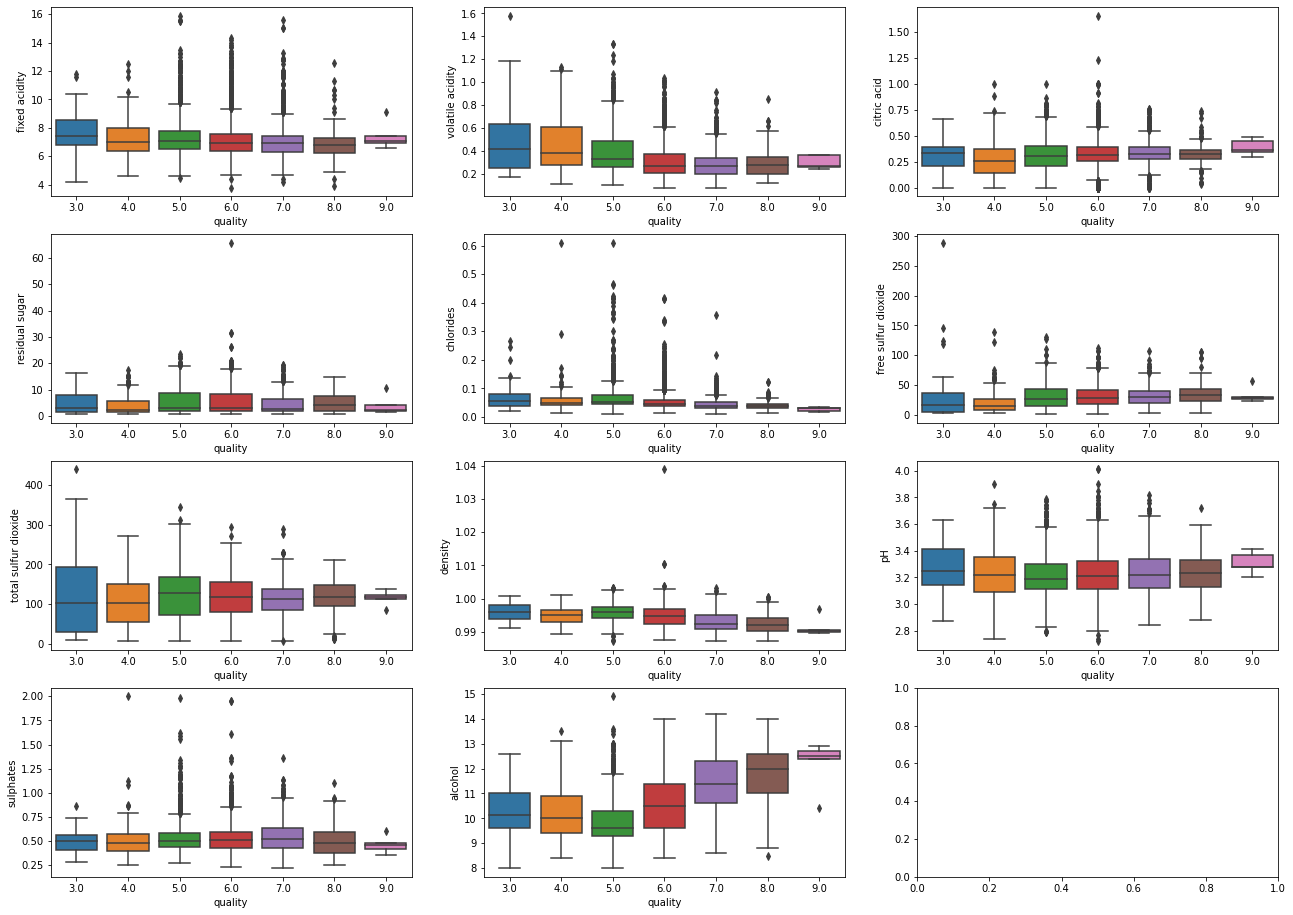

In [0]:
# quality 기준 속성별 데이터 분포도 확인 (Box plot)

fig, ax1 = plt.subplots(4,3, figsize=(22,16))
k = 0
for i in range(4) :
    for j in range(3) :
        if k != 11 :
            sns.boxplot('quality', wine_data.iloc[:, k], data = wine_data, ax = ax1[i][j])
            k += 1